In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

In [102]:
df = pd.read_excel('median_data.xlsx', index_col=0)

In [103]:
print(df)

        video id  Question 2: Sound (1-5)  Question 2.1: Music (1-5)  \
0    mSg4AmqvT0I                        4                          4   
1    Lol8sqRfQYE                        3                          3   
2    kwwGvRUyIG8                        4                          3   
3    52alUCchcBw                        2                          3   
4    iDCC0SEHDY8                        4                          4   
..           ...                      ...                        ...   
130  Yr9Z19ZWMfg                        4                          4   
131  umhYUSmtkIw                        3                          3   
132  7JsskyOhp0I                        4                          4   
133  usrgPQ74WVA                        3                          3   
134  eZCiJihCPUE                        5                          5   

     Question 2.2 : Noise control (1-5)  Question 2.3 : Speaking Style (1-5)  \
0                                     4                

In [104]:
df.columns

Index(['video id', 'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)', 'Attractive Level (1-5)'],
      dtype='object')

In [105]:
input_columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)','Question 2.2 : Noise control (1-5)','Question 2.3 : Speaking Style (1-5)', 
       'Question 3: Camera (1-5)','Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)', 'Question 4.2: Color (1-5)', 
       'Question 5: Content (1-5)', 'Question 5.1: Introduction (0-1)', 'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)', 'Question 6.2: Recommendation (0-1)', 'Question 6.3: Clear information (0-1)'
       ]
main_columns = [
        'Question 2: Sound (1-5)',
        'Question 3: Camera (1-5)',
        'Question 4: Images (1-5)', 
        'Question 5: Content (1-5)',
        'Question 6: Reviewer (1-5)'
       ]
output_column = 'Attractive Level (1-5)'

In [121]:
df.describe()

,Question 2: Sound (1-5),Question 2.1: Music (1-5),Question 2.2 : Noise control (1-5),Question 2.3 : Speaking Style (1-5),Question 3: Camera (1-5),Question 3.1: Stable (1-5),Question 3.2: Angel diversity (0-1),Question 4: Images (1-5),Question 4.1: Resolution (1-5),Question 4.2: Color (1-5),Question 5: Content (1-5),Question 5.1: Introduction (0-1),Question 5.2: Food description (0-1),Question 6: Reviewer (1-5),Question 6.1: Reviewer emotion is negative - neutral - positive (1-3),Question 6.2: Recommendation (0-1),Question 6.3: Clear information (0-1),Attractive Level (1-5)
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,3.370370,3.096296,3.044444,3.674074,3.629630,3.829630,0.785185,3.592593,4.000000,3.474074,3.444444,0.792593,0.614815,3.340741,2.511111,0.355556,0.770370,3.237037
std,0.912114,1.326392,1.118812,0.960641,1.041961,0.973843,0.412223,0.849023,0.546358,0.937045,1.097260,0.406960,0.488451,1.016013,0.516398,0.480464,0.422161,1.038134
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000,4.000000,3.000000,3.000000,1.000000,0.000000,3.000000,2.000000,0.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,5.000000


<AxesSubplot: xlabel='Attractive Level (1-5)', ylabel='Count'>

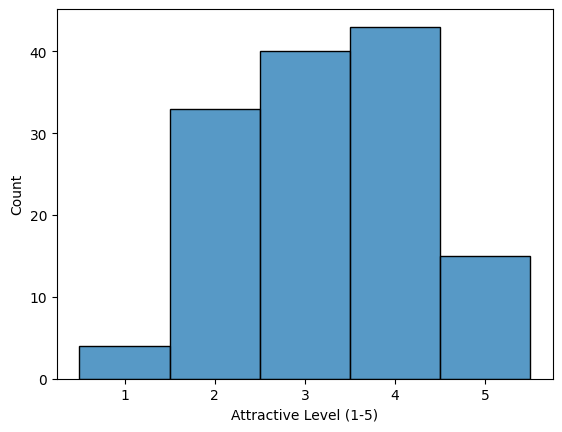

In [124]:
import seaborn as sns
sns.histplot(df['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df[input_columns][:], df[output_column][:], test_size=0.2, shuffle=True)

In [107]:
print(X_train.shape)
print(X_test.shape)

(108, 17)
(27, 17)


In [108]:
#create array of input
input_train = []*len(X_train)
for i in range(0, len(X_train)):
    y = []
    for j in X_train.iloc[i]:
        y.append(int(j))
    input_train.append(y)

In [109]:
#create array of output
output_train = []*len(y_train)
for i in range(0, len(y_train)):
    output_train.append([int(y_train.iloc[i])])

In [110]:
i_train = np.array(input_train)
o_train = np.array(output_train)

In [111]:
def hypothesis(X, theta): 
    return np.dot(X, theta) 

def gradient(x, y, theta): 
    h = hypothesis(x, theta) 
    grad = (x.T.dot(h-y))/x.shape[0] 
    return grad 
  

def loss(X, y, theta, m):
    loss_value = 1/(2 *m)* np.sum((hypothesis(X, theta) - y)**2)
    return loss_value

In [112]:
def gradientDescent(x, y, learning_rate = 0.005): 
    theta = np.array([[1]]*x.shape[1]) 
    
    while True:
        l_old = loss(x, y , theta, x.shape[0])
        theta = theta - learning_rate * gradient(x, y, theta)
        l_new = loss(x, y , theta, x.shape[0])
        if abs(l_new - l_old) < 1e-9:
            break

    return theta

In [113]:
theta = gradientDescent(i_train, o_train)

In [114]:
theta

array([[ 0.21650639],
       [ 0.0473037 ],
       [ 0.04341839],
       [-0.08491582],
       [ 0.24640068],
       [-0.01186643],
       [-0.15621056],
       [ 0.05499848],
       [-0.13203748],
       [ 0.17173449],
       [ 0.05319421],
       [-0.04543242],
       [ 0.02264922],
       [ 0.13445418],
       [ 0.23347089],
       [ 0.27876192],
       [ 0.35976909]])

In [115]:
input_test = []*len(X_test)
for i in range(0, len(X_test)):
    y = []
    for j in X_test.iloc[i]:
        y.append(int(j))
    input_test.append(y)
i_test = np.array(input_test)

In [116]:
output_test = []*len(y_test)
for i in range(0, len(y_test)):
    output_test.append([int(y_test.iloc[i])])

In [117]:
o_test = np.array(output_test)

In [118]:
test_df = pd.DataFrame({
    'Y_test' : o_test[:, 0],
    'Y_predict_round' : i_test.dot(theta).round()[:, 0],
    'Y_predict' : i_test.dot(theta)[:, 0]
})

In [119]:
test_df

,Y_test,Y_predict_round,Y_predict
0,4,4.0,4.083071
1,1,2.0,2.174623
2,4,4.0,4.138355
3,3,4.0,3.636901
4,4,4.0,4.261377
5,2,3.0,2.750552
6,3,3.0,2.845634
7,4,4.0,4.167417
8,3,2.0,2.469423
9,5,5.0,4.787028


Train accuracy:  0.7295455065303414
Test accuracy:  0.5021984551396316


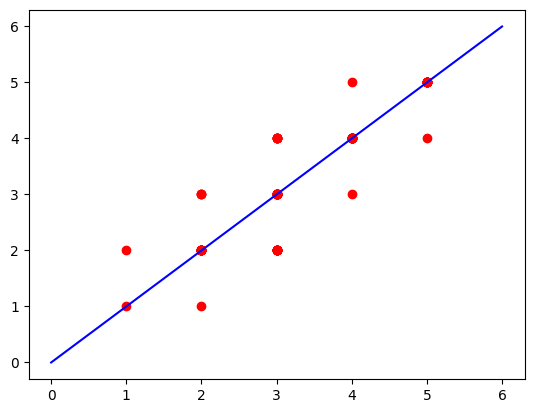

In [120]:
result = pd.DataFrame(i_train.dot(theta).round(), dtype = int)
plt.plot(result, y_train, 'ro')
plt.plot([0,6],[0,6], 'b-')
print('Train accuracy: ', f1_score(result, y_train, average='macro'))
result = pd.DataFrame(i_test.dot(theta).round(), dtype = int)
print('Test accuracy: ', f1_score(result, y_test, average='macro'))
